# Lab Assignment Seven: Sequential Neural Networks
### Authors
- Juliana Antonio
- Xiaona Hang
- Chuanqi Deng
### 1. Preparation


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_json("data/Sarcasm_Headlines_Dataset_v2.json", lines=True)
#remove article_link
data = data.drop(columns=['article_link'])
print("Shape of data:", data.shape)
data.head()

Shape of data: (28619, 2)


,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


<Axes: >

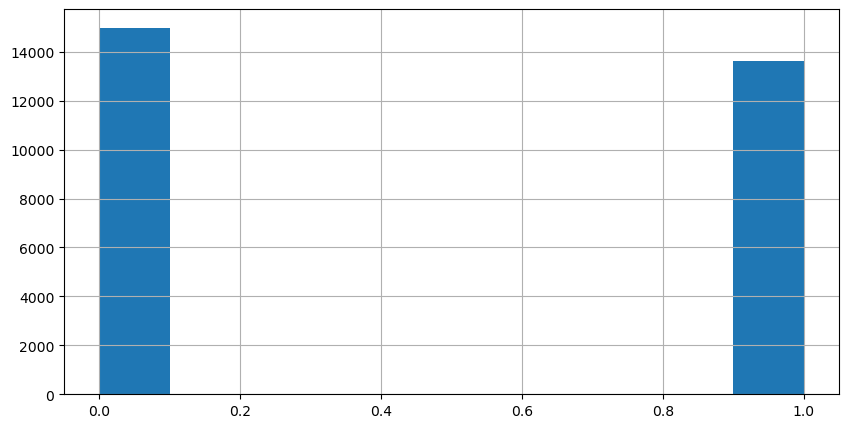

In [2]:
# distribution of sarcasim class
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
data['is_sarcastic'].hist(ax = ax)

In [3]:
data['is_sarcastic'].value_counts()

is_sarcastic
0    14985
1    13634
Name: count, dtype: int64

Since this is already in binary form for classifcation, we see that the distribution is pretty balanced between the sarcastic classifcation (1), which has 14985 instance, and non-sarcastic classifcation (0) which has 13634.

/Users/48923269/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/48923269/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


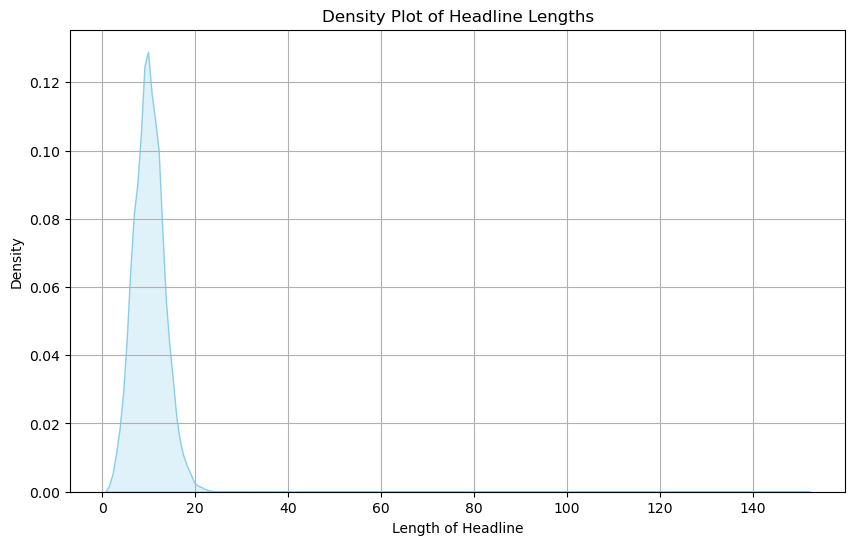

In [5]:
import seaborn as sns

headline_lengths = [len(headline.split()) for headline in data['headline']]

plt.figure(figsize=(10, 6))
sns.kdeplot(headline_lengths, fill=True, color='skyblue')
plt.title('Density Plot of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [6]:
min_length = float('inf')  # Initialize minimum length with infinity
max_length = 0  
total_length = 0  

# Iterate over each headline
for headline in data['headline']:
    headline_length = len(headline)
    
    if headline_length < min_length:
        min_length = headline_length
    if headline_length > max_length:
        max_length = headline_length
    
    total_length += headline_length

total_headlines = len(data)
average_length = total_length / total_headlines

print("Minimum headline length:", min_length)
print("Maximum headline length:", max_length)
print("Average headline length:", average_length)

Minimum headline length: 7
Maximum headline length: 926
Average headline length: 62.30857122890387


Methods of tokenization in the dataset involve converting text data into sequences of integers using Keras' Tokenizer class. However, the decision to force a specific length of sequence is influenced by the distribution of headline lengths. With a maximum headline length of 926 and a minimum length of 7, the average headline length might be biased/skewed. Even when looking at the density plot, which shows that 10 is the most frequent lenght, it is not a good indicator for choosing a max length, as we will lose a lot of information for the larger headlines. We therefore opted to start with a max length of 500 for padding sequences. This choice balances computational efficiency while accommodating the majority of headlines.

In [8]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

NUM_TOP_WORDS = None # use entire vocabulary!
MAX_LEN = 500 # maximum and minimum number of words

#tokenize the text
tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
tokenizer.fit_on_texts(data['headline'])
# save as sequences with integers replacing words
sequences = tokenizer.texts_to_sequences(data['headline'])

# Convert text data to sequences
sequences = tokenizer.texts_to_sequences(data['headline'])

word_index = tokenizer.word_index
NUM_TOP_WORDS = len(word_index) if NUM_TOP_WORDS==None else NUM_TOP_WORDS
top_words = min((len(word_index),NUM_TOP_WORDS))
print('Found %s unique tokens. Distilled to %d top words.' % (len(word_index),top_words))

X = pad_sequences(sequences, maxlen=MAX_LEN)

y_bin = data['is_sarcastic']
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y_bin.shape)
print(np.max(X))

Found 30884 unique tokens. Distilled to 30884 top words.
Shape of data tensor: (28619, 500)
Shape of label tensor: (28619,)
30884


The final dataset used for classification includes preprocessed headline text converted into sequences of integers using Keras' Tokenizer, with the binary variable is_sarcastic indicating headline sarcasm. This dataset facilitates the development of a machine learning model to automatically identify and classify sarcastic headlines, offering valuable insights for media analysis and content moderation in online platforms.

### Evaluation Metrics

In evaluating the algorithm's performance for classifying sarcastic headlines, precision and recall metrics will be used. Precision measures the accuracy of positive predictions, ensuring few false positives, while recall measures the completeness of positive predictions, ensuring few false negatives. These metrics are crucial for balancing the costs of misclassifying sarcastic headlines and are directly aligned with the business objective of accurately identifying sarcasm to enhance user experience and platform credibility.

### Training and Testing

We will use shuffle splits to divide the data into training and testing sets. Shuffle splits randomly shuffle the data and then split it into training and testing sets multiple times, reducing bias and variance in model evaluation. This method reflects how an algorithm would be used in practice, as it allows for diverse training and testing data combinations. By randomly shuffling the data, we ensure that the model learns from a representative sample of the data, leading to more robust and generalizable results. Additionally, it provides flexibility in the allocation of data for training and testing, accommodating various scenarios encountered in real-world applications.

In [9]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score, recall_score

num_splits = 5

# Initialize ShuffleSplit object
shuffle_split = ShuffleSplit(n_splits=num_splits, test_size=0.2, random_state=42)

for split, (train_index, test_index) in enumerate(shuffle_split.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]

    print(f"Split {split}: Training set - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"Split {split}: Testing set - X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Split 1: Training set - X_train shape: (22895, 500), y_train shape: (22895,)
Split 1: Testing set - X_test shape: (5724, 500), y_test shape: (5724,)
Split 2: Training set - X_train shape: (22895, 500), y_train shape: (22895,)
Split 2: Testing set - X_test shape: (5724, 500), y_test shape: (5724,)
Split 3: Training set - X_train shape: (22895, 500), y_train shape: (22895,)
Split 3: Testing set - X_test shape: (5724, 500), y_test shape: (5724,)
Split 4: Training set - X_train shape: (22895, 500), y_train shape: (22895,)
Split 4: Testing set - X_test shape: (5724, 500), y_test shape: (5724,)
Split 5: Training set - X_train shape: (22895, 500), y_train shape: (22895,)
Split 5: Testing set - X_test shape: (5724, 500), y_test shape: (5724,)


References:

1. Misra, Rishabh. "News Category Dataset." arXiv preprint arXiv:2209.11429 (2022).
2. Misra, Rishabh and Jigyasa Grover. "Sculpting Data for ML: The first act of Machine Learning." ISBN 9798585463570 (2021).
